In [111]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
df=pd.read_csv('influenza_updated.csv')
df1=pd.read_csv('mers_updated.csv')

In [113]:
df['Start Date'] = pd.to_datetime(df['Start Date'], format='%d/%m/%Y')

In [114]:
df.set_index('Start Date',inplace=True)

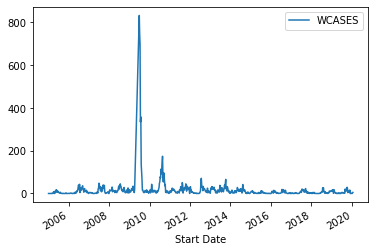

In [115]:
df.plot()

In [116]:
#Every Row is a Week So 100 means 100 Weeks and they are our test data
test_weeks=50

In [117]:
# Here We Split the dataset
test_index=len(df)-test_weeks

In [118]:
test_index

705

In [119]:
# Here We get are train dataset
train=df.iloc[:test_index]

In [120]:
train

,WCASES
Start Date,
2005-01-03,0
2005-01-10,0
2005-01-17,0
2005-01-24,0
2005-01-31,0
...,...
2018-12-31,11
2019-01-07,15
2019-01-14,12


In [121]:
# Here is our Test Dataset
test=df.iloc[test_index:]

In [122]:
train

,WCASES
Start Date,
2005-01-03,0
2005-01-10,0
2005-01-17,0
2005-01-24,0
2005-01-31,0
...,...
2018-12-31,11
2019-01-07,15
2019-01-14,12


In [123]:
test

,WCASES
Start Date,
2019-02-04,1
2019-02-11,18
2019-02-18,12
2019-02-25,6
2019-03-04,5
2019-03-11,1
2019-03-18,2
2019-03-25,2
2019-04-01,0


In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler=MinMaxScaler()

In [126]:
scaler.fit(train)

MinMaxScaler()

In [127]:
scaled_train=scaler.transform(train)

In [128]:
scaled_test=scaler.transform(test)

In [129]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [130]:
# Here We Create Time Series Generator 

length=100
generator=TimeseriesGenerator(scaled_train,scaled_train,length,batch_size=1)

In [131]:
X,y=generator[0]

In [132]:
train

,WCASES
Start Date,
2005-01-03,0
2005-01-10,0
2005-01-17,0
2005-01-24,0
2005-01-31,0
...,...
2018-12-31,11
2019-01-07,15
2019-01-14,12


In [133]:
X

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00120192],
        [0.        ],
        [0.00120192],
        [0.        ],
        [0.00120192],
        [0.00961538],
        [0.00120192],
        [0.00841346],
        [0.        ],
        [0.01322115],
        [0.01442308],
        [0.00961538],
        [0.02163462],
        [0.00841346],
        [0.01682692],
        [0.00841346],
        [0.01322115],
        [0.00841346],
        [0.00600962],
        [0.00480769],
        [0.00240385],
        [0.00360577],
        [0.00721154],
        [0.00120192],
        [0.00120192],
        [0.00120192],
        [0.        ],
        [0.00120192],
        [0.        ],
        [0.        ],
        [0.00120192],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00360577],
        [0

In [134]:
y

array([[0.00360577]])

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [161]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(100))
model.add(Dense(100))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer='adam',loss='mse')

In [162]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 101       
Total params: 61,101
Trainable params: 61,101
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.fit(generator,epochs=10])

Epoch 1/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0040 - val_loss: 0.0054
Epoch 2/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0031 - val_loss: 1.3032e-04
Epoch 3/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0052 - val_loss: 1.4206e-04
Epoch 4/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0030 - val_loss: 3.6624e-04
Epoch 5/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0024 - val_loss: 8.7810e-05
Epoch 6/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0035 - val_loss: 5.8247e-05
Epoch 7/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0028 - val_loss: 5.3160e-05
Epoch 8/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0019 - val_loss: 0.0091
Epoch 9/10
605/605 [==============================] - 10s 17ms/step - loss: 0.0024 - val_loss: 0.0109
Epoch 10/10
605/605 [==============================] - 10s

In [166]:
losses=pd.DataFrame(model.history.history)

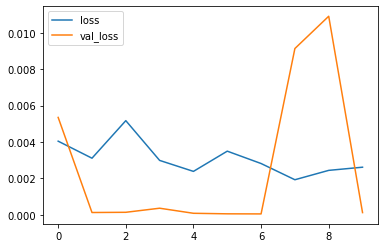

In [167]:
losses.plot()

In [168]:
import numpy as np

In [169]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [170]:
true_predictions=scaler.inverse_transform(test_predictions)

In [171]:
test.shape

(50, 2)

In [172]:
true_predictions.shape

(50, 1)

In [173]:
true_predictions

array([[16.81178927],
       [16.89707506],
       [16.94471812],
       [16.97022653],
       [16.9831264 ],
       [16.98907888],
       [16.99136937],
       [16.99184823],
       [16.99152744],
       [16.9909246 ],
       [16.99028921],
       [16.98972976],
       [16.98927724],
       [16.98892701],
       [16.9886651 ],
       [16.98847604],
       [16.98833501],
       [16.98823738],
       [16.98816454],
       [16.9881134 ],
       [16.98807621],
       [16.98804986],
       [16.98802972],
       [16.98801267],
       [16.98800182],
       [16.98799253],
       [16.98798633],
       [16.98798013],
       [16.98797703],
       [16.98797393],
       [16.98797238],
       [16.98797083],
       [16.98796928],
       [16.98796773],
       [16.98796773],
       [16.98796773],
       [16.98796773],
       [16.98796773],
       [16.98796773],
       [16.98796773],
       [16.98796618],
       [16.98796618],
       [16.98796618],
       [16.98796618],
       [16.98796618],
       [16

In [174]:
test['preictions']=true_predictions

<ipython-input-174-c2f8385769d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['preictions']=true_predictions


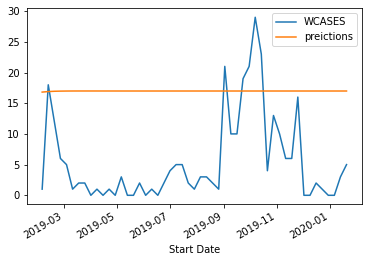

In [175]:
test.plot()

In [164]:
from sklearn.metrics import mean_squared_error

In [165]:
np.sqrt(mean_squared_error(scaled_test,test_predictions))

0.009609382095782992

In [195]:
full_scaler=MinMaxScaler()

In [196]:
full_scaled=full_scaler.fit_transform(df)

In [197]:
length=50

In [198]:
generator=TimeseriesGenerator(full_scaled,full_scaled,length=length,batch_size=1)

In [199]:
n_features=1
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer='adam',loss='mse')

In [200]:
model.fit(generator,epochs=7)

Epoch 1/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0040
Epoch 2/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0032
Epoch 3/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0029
Epoch 4/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0026
Epoch 5/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0023
Epoch 6/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0022
Epoch 7/7
705/705 [==============================] - 6s 8ms/step - loss: 0.0020


In [171]:
losses=pd.DataFrame(model.history.history)

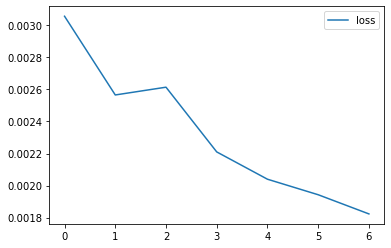

In [172]:
losses.plot()

In [201]:
import numpy as np

In [202]:
forecast=[]
periods=10
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [203]:
forecast=scaler.inverse_transform(forecast)

In [204]:
df.iloc[-1]

WCASES    5
Name: 2020-01-20 00:00:00, dtype: int64

In [206]:
forecast

array([[ 6.69274729],
       [ 8.92883319],
       [10.50673407],
       [11.52584207],
       [12.05993241],
       [12.23152447],
       [12.17177188],
       [11.99483639],
       [11.78571397],
       [11.59807301]])

In [207]:
forecast_index=pd.date_range(start='2005-3-1',periods=periods,freq="W")

In [208]:
forecast_index

DatetimeIndex(['2005-03-06', '2005-03-13', '2005-03-20', '2005-03-27',
               '2005-04-03', '2005-04-10', '2005-04-17', '2005-04-24',
               '2005-05-01', '2005-05-08'],
              dtype='datetime64[ns]', freq='W-SUN')

In [209]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,columns=df.columns)

In [235]:
df

,WCASES
Start Date,
2005-01-03,0
2005-01-10,0
2005-01-17,0
2005-01-24,0
2005-01-31,0
...,...
2019-12-16,2
2019-12-30,0
2020-01-06,0


In [23]:
from datetime import datetime

In [25]:
now=datetime.now()

In [26]:
current_time = now.strftime("%d/%m/%Y")
print("Current Time =", current_time)

Current Time = 15/01/2022
